In [1]:
import os, shutil

In [2]:
base_dir = '/home/skhatter/Transfer_Learning/512_original/'
train_dir = '/home/skhatter/Transfer_Learning/512_original/train'
valid_dir = '/home/skhatter/Transfer_Learning/512_original/validation'

train_dam_dir = '/home/skhatter/Transfer_Learning/512_original/train/damaged'
train_undam_dir = '/home/skhatter/Transfer_Learning/512_original/train/undamaged'

valid_dam_dir = '/home/skhatter/Transfer_Learning/512_original/validation/damaged'
valid_undam_dir = '/home/skhatter/Transfer_Learning/512_original/validation/undamaged'

In [3]:
print('Total training damaged images', len(os.listdir(train_dam_dir)))
print('Total training undamaged images', len(os.listdir(train_undam_dir)))

print('Total validation damaged images', len(os.listdir(valid_dam_dir)))
print('Total validation undamaged images', len(os.listdir(valid_undam_dir)))

Total training damaged images 1501
Total training undamaged images 2541
Total validation damaged images 26
Total validation undamaged images 21


In [4]:
from keras import layers
from keras import models
from keras.applications import VGG16

Using TensorFlow backend.


In [5]:
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape=(512,512,3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0         
__________

In [6]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 5

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count,16,16,512 ))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(512,512),
                                           batch_size=batch_size, class_mode='binary')
    i =0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 4040)
validation_features, validation_labels = extract_features(valid_dir, 45)    

Found 4040 images belonging to 2 classes.
Found 45 images belonging to 2 classes.


In [8]:
train_features = np.reshape(train_features, (4040, 16*16*512))
validation_features = np.reshape(validation_features, (45, 16*16*512))

In [9]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=16*16*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])

In [10]:
history = model.fit(train_features, train_labels, epochs=100, 
                    batch_size =5, 
                    validation_data=(validation_features, validation_labels))

Train on 4040 samples, validate on 45 samples
Epoch 1/100
4040/4040 [==============================] - 16s - loss: 0.5601 - acc: 0.7329 - val_loss: 0.3515 - val_acc: 0.8889
Epoch 2/100
4040/4040 [==============================] - 16s - loss: 0.3960 - acc: 0.8287 - val_loss: 0.4335 - val_acc: 0.8667
Epoch 3/100
4040/4040 [==============================] - 16s - loss: 0.3374 - acc: 0.8621 - val_loss: 0.4203 - val_acc: 0.8889
Epoch 4/100
4040/4040 [==============================] - 16s - loss: 0.2945 - acc: 0.8802 - val_loss: 0.5121 - val_acc: 0.8667
Epoch 5/100
4040/4040 [==============================] - 16s - loss: 0.2816 - acc: 0.8886 - val_loss: 0.5751 - val_acc: 0.8667
Epoch 6/100
4040/4040 [==============================] - 16s - loss: 0.2527 - acc: 0.8998 - val_loss: 0.5081 - val_acc: 0.9111
Epoch 7/100
4040/4040 [==============================] - 16s - loss: 0.2451 - acc: 0.9099 - val_loss: 0.6047 - val_acc: 0.8889
Epoch 8/100
4040/4040 [==============================] - 16s - lo

4040/4040 [==============================] - 16s - loss: 0.0645 - acc: 0.9844 - val_loss: 0.8211 - val_acc: 0.9333
Epoch 65/100
4040/4040 [==============================] - 16s - loss: 0.0677 - acc: 0.9829 - val_loss: 0.7941 - val_acc: 0.9333
Epoch 66/100
4040/4040 [==============================] - 16s - loss: 0.0455 - acc: 0.9874 - val_loss: 0.7763 - val_acc: 0.9333
Epoch 67/100
4040/4040 [==============================] - 16s - loss: 0.0582 - acc: 0.9856 - val_loss: 0.8580 - val_acc: 0.9333
Epoch 68/100
4040/4040 [==============================] - 16s - loss: 0.0562 - acc: 0.9869 - val_loss: 0.8245 - val_acc: 0.9333
Epoch 69/100
4040/4040 [==============================] - 16s - loss: 0.0542 - acc: 0.9874 - val_loss: 0.8367 - val_acc: 0.9333
Epoch 70/100
4040/4040 [==============================] - 16s - loss: 0.0550 - acc: 0.9874 - val_loss: 0.8371 - val_acc: 0.9333
Epoch 71/100
4040/4040 [==============================] - 16s - loss: 0.0508 - acc: 0.9866 - val_loss: 0.8675 - val_a

In [11]:
history_dict = history.history
print(history_dict.keys())

model.save('damage_undamaged_conv3_vgg.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


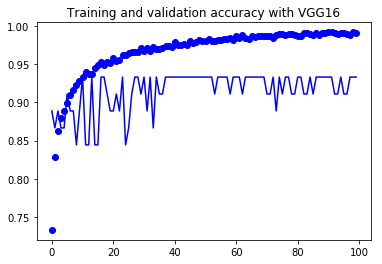

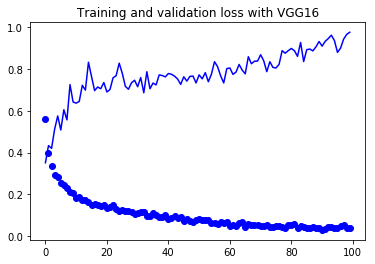

In [12]:
#Displaying curves of loss and accuracy during training 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo')#dots
plt.plot(epochs, val_acc, 'b')#line segments
plt.title('Training and validation accuracy with VGG16')
plt.figure()

plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss with VGG16')
plt.show()